<a href="https://colab.research.google.com/github/djibril6/djibril6-OptimizationAlgorithms-/blob/main/Simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated annealing with python
Djibril ISSOUFOU MAMAN





In [ ]:
%matplotlib inline 

from mpl_toolkits import mplot3d

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math

In [ ]:
mpl.style.use(['ggplot'])

In [ ]:
def clip(x, interval):
  """ Force x to be in the interval."""
  a, b = interval
  return max(min(x, b), a)

def random_start(interval):
  """ Random starting point in the interval."""
  a, b = interval
  return a + (b - a) * np.random.random_sample()

In [ ]:
# Simulated annealing algorithm 
def sim_annealing(cost_function, interval_x, interval_y, temperature=100, cooling=0.8, minimization=True):
    """ Use simulated annealing algorithm to optimize cost_function """
    """ 
      cost_function: the function we want to optimize,
      interval_x: Interval of x parameter (for example: (-3, 3))
      interval_y: Interval of y parameter (for example: (-3, 3))
      temperature: Starting temperature
      cooling: rate of temperature decrease
      minimization: can be set to False if we want to maximize the cost_function
    """
    x_state = random_start(interval_x) # x starting point
    y_state = random_start(interval_x) # y starting point
    cost = cost_function(x_state, y_state) # starting cost
    print("x_start = {:>4g}, y_start = {:>4g}, cost_start = {:>4g}".format(x_state, y_state, cost))
  
    loop_time = 1 # second(s) time for stoping the computing
    tic = time.time()
    nb_stage = 1000000 # number of stage temperature
    nb_iteration = 100 # number of iteration at stage temperature
    cost_list = [] # list of cost selected
 
    for i in range(nb_stage):
        for j in range(nb_iteration):
             
            x_state_new = x_state + 0.1*random_start(interval_x)
            x_state_new = clip(x_state_new, interval_x) # repair the solution respecting the interval
            y_state_new = y_state + 0.1*random_start(interval_y)
            y_state_new = clip(y_state_new, interval_y)
  
            cost_new = cost_function(x_state_new, y_state_new)
            delta = abs(cost_new - cost)
             
            if (cost_new < cost and not minimization) or (cost_new > cost and minimization):
                p = math.exp(-delta/(temperature))
                # make a decision to accept the worse solution or not (Metropolis acceptance probaility)
                if random.random()<p:
                    accept = True
                else:
                    accept = False
            else:
                accept = True

            if accept==True:
                # Get the best solution 
                x_state = x_state_new
                y_state = y_state_new
                cost = cost_new
     
        cost_list.append(cost)
        # new temperature
        temperature = temperature*cooling
        # Stop by computing time
        toc = time.time()
        if toc-tic >= loop_time:
            print("Final temperature: {}".format(temperature))
            break
    plt.suptitle("Convergence")
    plt.plot(cost_list)
    return x_state, y_state, cost, cost_list
  

# **Problem 1**
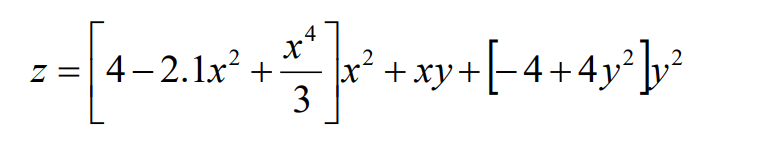

In [ ]:
def g(x, y):
  """ cost function 1: """
  return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2) - 4)*(y**2)

**Visualization**

Text(0.5, 0, 'z')

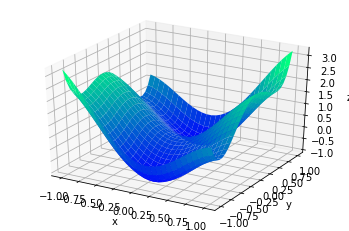

In [ ]:
x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Now let's try to optimize using 5 different random starting points for the x and y parameters

x_start = -2.40638, y_start = 1.80272, cost_start = 42.3776
Final temperature: 1e-323
best cost = -1.03163, state = (0.0895971, -0.712571)


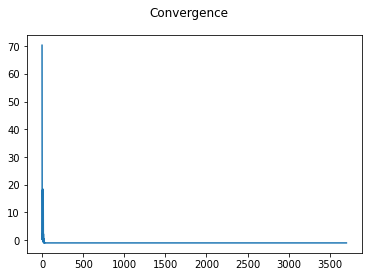

In [ ]:
###### 1
## The True parameter defines that we want to minimize 
x_state, y_state, cost, cost_list_1 = sim_annealing(g, (-3, 3), (-2, 2), 100, 0.8, True)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -2.35147, y_start = -0.791092, cost_start = 15.188
Final temperature: 1e-323
best cost = -1.03163, state = (-0.0892904, 0.712573)


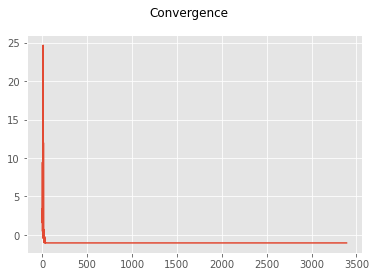

In [ ]:
###### 2
## with new x_start and y_start
x_state, y_state, cost, cost_list = sim_annealing(g, (-3, 3), (-2, 2), 100, 0.8, True)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -0.30557, y_start = -1.48967, cost_start = 11.6319
Final temperature: 1e-323
best cost = -1.03163, state = (0.0898257, -0.712821)


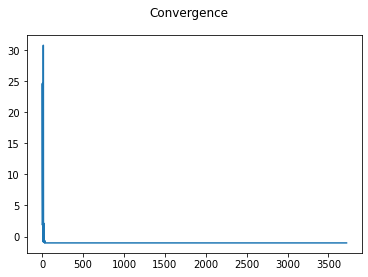

In [ ]:
###### 3
## with new x_start and y_start
x_state, y_state, cost, cost_list = sim_annealing(g, (-3, 3), (-2, 2), 100, 0.8, True)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -1.87155, y_start = -0.0905352, cost_start = 2.70779
Final temperature: 1e-323
best cost = -1.03163, state = (0.0894291, -0.712778)


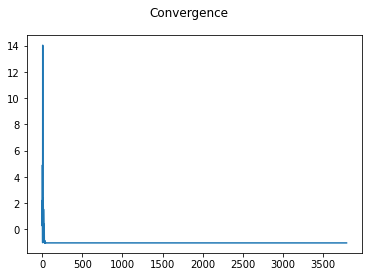

In [ ]:
###### 4
## with new x_start and y_start
x_state, y_state, cost, cost_list = sim_annealing(g, (-3, 3), (-2, 2), 100, 0.8, True)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = 1.51153, y_start = 0.190405, cost_start = 2.3004
Final temperature: 1e-323
best cost = -1.03163, state = (-0.0899323, 0.712745)


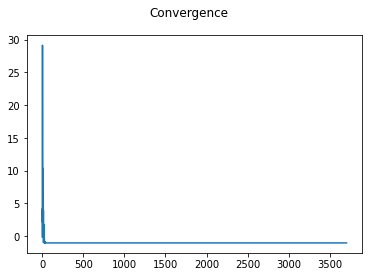

In [ ]:
###### 5
## with new x_start and y_start
x_state, y_state, cost, cost_list = sim_annealing(g, (-3, 3), (-2, 2), 100, 0.8, True)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

**As we can see, we always converge on the best optimization regardless of the starting points.**

## **Problem 2: Maximization**
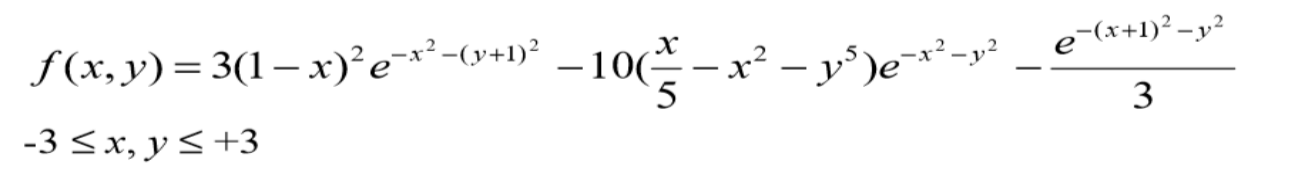




In [ ]:
def f(x, y): 
  """ cost function 2: """
  return 3*((1-x)**2)*np.exp(-(x**2)-(y+1)**2) - 10*((x/5)-(x**2)-(y**5))*np.exp(-(x**2)-(y**2)) - np.exp(-((x+1)**2) - (y**2))/3

**Visualization**

Text(0.5, 0, 'z')

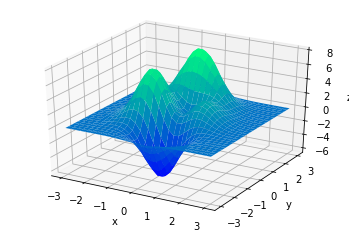

In [ ]:
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Let's try to optimize using 5 different random starting points for the x and y parameters

x_start = 2.39021, y_start = 1.03171, cost_start = 0.0732538
Final temperature: 5.510329119774442e-206
best cost = 8.10626, state = (-0.00842664, 1.58188)


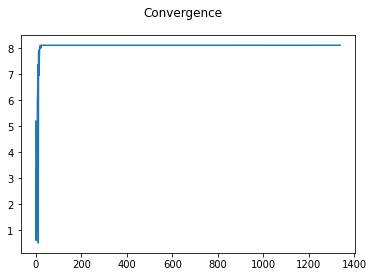

In [ ]:
###### 1
x_state, y_state, cost, cost_list_2 = sim_annealing(f, (-3, 3), (-2, 2), 100, 0.7, False)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -0.391377, y_start = 0.5043, cost_start = 2.09688
Final temperature: 5.8698702117923025e-202
best cost = 6.90274, state = (-0.814645, -0.483828)


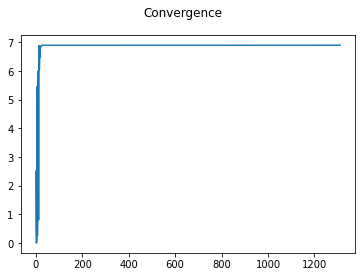

In [ ]:
###### 2
## with new x_start and y_start
x_state, y_state, cost, cost_list = sim_annealing(f, (-3, 3), (-2, 2), 100, 0.7, False)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -0.96645, y_start = -1.65277, cost_start = 0.0882534
Final temperature: 1.1979326962841436e-201
best cost = 8.10629, state = (-0.010683, 1.58125)


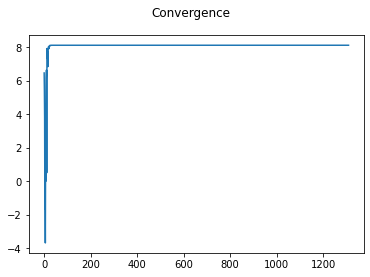

In [ ]:
###### 3
x_state, y_state, cost, cost_list = sim_annealing(f, (-3, 3), (-2, 2), 100, 0.7, False)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = -0.782186, y_start = -2.71605, cost_start = -0.227144
Final temperature: 7.627004791883153e-208
best cost = 8.10629, state = (-0.0104028, 1.58126)


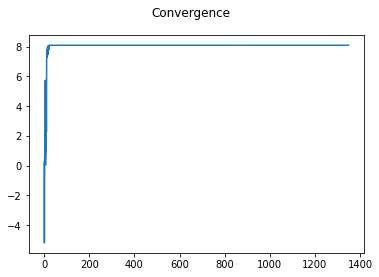

In [ ]:
###### 4
x_state, y_state, cost, cost_list = sim_annealing(f, (-3, 3), (-2, 2), 100, 0.7, False)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

x_start = 0.00621306, y_start = 2.57725, cost_start = 1.48265
Final temperature: 8.124655943401189e-204
best cost = 6.90273, state = (-0.815004, -0.483396)


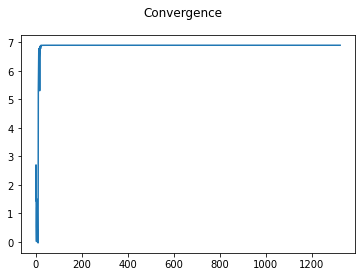

In [ ]:
###### 5
x_state, y_state, cost, cost_list = sim_annealing(f, (-3, 3), (-2, 2), 100, 0.7, False)
print("best cost = {:>4g}, state = ({:>4g}, {:>4g})".format(cost, x_state, y_state))

**There is convergence regardless of the starting parameters**

## Visualization of convergence of the 2 problems

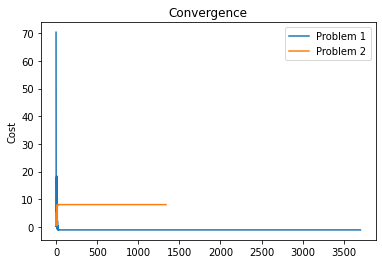

In [ ]:
plt.plot(cost_list_1, label = "Problem 1")
plt.plot(cost_list_2, label = "Problem 2")
plt.ylabel('Cost')
plt.title('Convergence')
plt.legend()
plt.show()